De realizat:
1. Definiti o serie pandas.
2. Definiti un dataframe in pandas.
3. Cum veti afisa numai filmele de la DC pentru DataFrame-ul new_csv?
4. Cum veti afisa numai anul si titlu pentru filmele de la  Marvel?
5. Desenati graficul pentru PretulMediuLaBilet cu Anul pe axa y. Culoarea liniei sa fie neagra.

In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
%matplotlib inline

In [4]:
csv = pd.read_csv("imbd_superhero.csv", 
                  header=None, 
                  names=['An', 'Titlu','Organizatia', 'IMBD', 'AltRating', 'DataX', 'UnknownColumn', 'PretMediulaBilet', 'NrDeSpectatori', 'TopPentruAncutare'])
csv.head(8)

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnknownColumn,PretMediulaBilet,NrDeSpectatori,TopPentruAncutare
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3.190318e+06,222584545
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5.241830e+06,227224681
2,1982,Swamp Thing,DC,5.3,60,56.5,NaN,2.94,NaN,231664458
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4.238843e+06,233791994
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1.707812e+06,235824902
5,1986,Howard the Duck,Marvel,4.3,16,29.5,5070136.0,3.71,1.366613e+06,240132887
6,1987,Superman IV: The Quest for Peace,DC,3.6,10,23.0,5683122.0,3.91,1.453484e+06,242288918
7,1989,Batman,DC,7.6,71,73.5,40489746.0,3.97,1.019893e+07,246819230


In [5]:
sr = pd.Series(csv['Organizatia'])
print(sr.head(10))

0        DC
1        DC
2        DC
3        DC
4        DC
5    Marvel
6        DC
7        DC
8        DC
9    Marvel
Name: Organizatia, dtype: object


In [7]:
df = pd.DataFrame(csv)
print(df[['An', 'Titlu','Organizatia', 'IMBD', 'AltRating']].head(10))

     An                             Titlu Organizatia  IMBD  AltRating
0  1978                          Superman          DC   7.3         95
1  1980                       Superman II          DC   6.7         88
2  1982                       Swamp Thing          DC   5.3         60
3  1983                      Superman III          DC   4.9         24
4  1984                         Supergirl          DC   4.2          8
5  1986                   Howard the Duck      Marvel   4.3         16
6  1987  Superman IV: The Quest for Peace          DC   3.6         10
7  1989                            Batman          DC   7.6         71
8  1989         The Return of Swamp Thing          DC   3.9         40
9  1989                      The Punisher      Marvel   5.4         24


In [11]:
dc =  csv[csv['Organizatia'] == "DC"]
dc.head(11)

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnknownColumn,PretMediulaBilet,NrDeSpectatori,TopPentruAncutare
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3.190318e+06,222584545
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5.241830e+06,227224681
2,1982,Swamp Thing,DC,5.3,60,56.5,NaN,2.94,NaN,231664458
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4.238843e+06,233791994
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1.707812e+06,235824902
6,1987,Superman IV: The Quest for Peace,DC,3.6,10,23.0,5683122.0,3.91,1.453484e+06,242288918
7,1989,Batman,DC,7.6,71,73.5,40489746.0,3.97,1.019893e+07,246819230
8,1989,The Return of Swamp Thing,DC,3.9,40,39.5,NaN,3.97,NaN,246819230
10,1992,Batman Returns,DC,7.0,78,74.0,45687711.0,4.15,1.100909e+07,255029699
11,1995,Batman Forever,DC,5.4,42,48.0,52784433.0,4.35,1.213435e+07,262803276


In [13]:
marvel = csv[csv['Organizatia'] == "Marvel"][['An', 'Titlu','Organizatia']]
marvel.head(10)

,An,Titlu,Organizatia
5,1986,Howard the Duck,Marvel
9,1989,The Punisher,Marvel
14,1998,Blade,Marvel
15,2000,X-Men,Marvel
16,2002,Blade II,Marvel
17,2002,Spider-Man,Marvel
18,2003,Daredevil,Marvel
19,2003,Hulk,Marvel
20,2003,X2,Marvel
21,2004,Blade: Trinity,Marvel


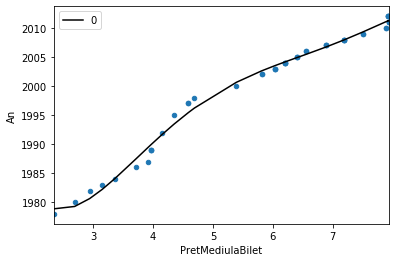

In [15]:
plot = csv.plot.scatter(x = 'PretMediulaBilet', y = 'An')
z = np.polyfit(x=csv.PretMediulaBilet, y=csv.An, deg=5)
p = np.poly1d(z)
trendline = pd.DataFrame(data=p(csv.PretMediulaBilet), index=csv.PretMediulaBilet)
trendline.plot.line(ax=plot, color='Black')